# Ford Bay Wheels Data for May 2020
## by Maciej Socha

# Preliminary Assessment

Bay Wheels data set taken from 05.2020 contains over 130000 rent records. We can find out when trip started and ended, also we can see both station name and station ID, also start and finish. Dataset provides us also with information whether bike rented was electric or docked. We can also deffrienciate renters if they were casual (one time off) or members (multi trips).

Taken from:
https://s3.amazonaws.com/baywheels-data/202005-baywheels-tripdata.csv.zip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('baywheels.csv')

In [3]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False
5,E0937CAFF4D56EC0,electric_bike,2020-05-11 08:45:24,2020-05-11 08:52:55,NaN,NaN,NaN,NaN,37.7856,-122.4134,37.7894,-122.4156,casual,False
6,82AB84FFF9D4A01E,electric_bike,2020-05-11 00:12:32,2020-05-11 00:22:25,NaN,NaN,NaN,NaN,37.7783,-122.4143,37.7781,-122.4142,casual,False
7,87AB71D10C30CBBA,electric_bike,2020-05-10 23:58:34,2020-05-11 00:00:44,NaN,NaN,NaN,NaN,37.7285,-122.3847,37.7294,-122.3866,casual,False
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,-121.8849,casual,False
9,6B81C2AF414B8AD3,electric_bike,2020-05-11 23:01:05,2020-05-11 23:44:36,NaN,NaN,NaN,NaN,37.7786,-122.3911,37.7968,-122.4225,casual,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             138251 non-null  object 
 1   rideable_type       138251 non-null  object 
 2   started_at          138251 non-null  object 
 3   ended_at            138251 non-null  object 
 4   start_station_name  87315 non-null   object 
 5   start_station_id    87315 non-null   float64
 6   end_station_name    84779 non-null   object 
 7   end_station_id      84779 non-null   float64
 8   start_lat           138251 non-null  float64
 9   start_lng           138251 non-null  float64
 10  end_lat             138027 non-null  float64
 11  end_lng             138027 non-null  float64
 12  member_casual       138251 non-null  object 
 13  is_equity           138251 non-null  bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 13.8+ MB


In [5]:
df['member_casual'].unique()

array(['casual', 'member'], dtype=object)

### What is the structure of your dataset?

     - Data is structired very clearly and there is no that much of wrangling needed. There is a lot of data missing for     start / end stations needed and for certaint part of analysis I will drop those rows as they will not be necessary.
    - Checking distance travelled although seems impossible, we could try to count it by substracting start and end lat/ lng. It will not be that much clear how it relates to true distance travelled, just length between start and end stations. Usually there is no GPS in bikes which track distance would be our best guess, due to unreliable data I will not perform analysis on this task.

### What is/are the main feature(s) of interest in your dataset?

    - Proportions of members - casual renters
    - Proportions of types of rented bikes
    - Length of rents
    - Most popular renting days 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    - Dataset considering above analysis criteria, we have almost all necessary data to perform analysis.

In [6]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             138251 non-null  object        
 1   rideable_type       138251 non-null  object        
 2   started_at          138251 non-null  datetime64[ns]
 3   ended_at            138251 non-null  datetime64[ns]
 4   start_station_name  87315 non-null   object        
 5   start_station_id    87315 non-null   float64       
 6   end_station_name    84779 non-null   object        
 7   end_station_id      84779 non-null   float64       
 8   start_lat           138251 non-null  float64       
 9   start_lng           138251 non-null  float64       
 10  end_lat             138027 non-null  float64       
 11  end_lng             138027 non-null  float64       
 12  member_casual       138251 non-null  object        
 13  is_equity           138251 no

## Wrangling

Due to updated and cleaned data by Lyft, there is actually not that much wrangling needed.
    - change type of 'start_station_id' to object
    - Change type of 'started_at' and 'ended_at' to DateTime
    - add 'time_diff' to measure time difference between start and finish
    - add 'time_diff_seconds' to see seconds of rent
    - add 'time_diff_days' to see days of rent
    - add 'start_day' to see start day of rent
    - add 'start_hour' - to see start hour of rent
   

In [8]:
df['start_day'] = df.started_at.dt.strftime('%A')
df['start_hour'] = df.started_at.dt.strftime('%H')

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,start_day,start_hour
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False,Monday,22
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False,Tuesday,16
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False,Monday,20
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False,Tuesday,14
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False,Sunday,17


In [10]:
df['start_station_id'] = df['start_station_id'].astype(object) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             138251 non-null  object        
 1   rideable_type       138251 non-null  object        
 2   started_at          138251 non-null  datetime64[ns]
 3   ended_at            138251 non-null  datetime64[ns]
 4   start_station_name  87315 non-null   object        
 5   start_station_id    87315 non-null   object        
 6   end_station_name    84779 non-null   object        
 7   end_station_id      84779 non-null   float64       
 8   start_lat           138251 non-null  float64       
 9   start_lng           138251 non-null  float64       
 10  end_lat             138027 non-null  float64       
 11  end_lng             138027 non-null  float64       
 12  member_casual       138251 non-null  object        
 13  is_equity           138251 no

In [12]:
df['time_diff'] = df['ended_at'] - df['started_at'] 

In [13]:
df['time_diff_days'] = df['time_diff'].dt.days

In [14]:
df['time_diff_seconds'] = df['time_diff'].dt.days * 86400 + df['time_diff'].dt.seconds

In [15]:
df.describe()

,end_station_id,start_lat,start_lng,end_lat,end_lng,time_diff,time_diff_days,time_diff_seconds
count,84779.000000,138251.000000,138251.000000,138027.000000,138027.000000,138251,138251.000000,1.382510e+05
mean,226.186567,37.722310,-122.343617,37.722268,-122.344021,0 days 00:28:59.217242,0.002510,1.739217e+03
std,170.207720,0.151435,0.182993,0.151488,0.183225,0 days 04:35:19.518120,0.186529,1.651952e+04
min,3.000000,37.239200,-122.514300,37.004600,-122.559000,-1 days +23:59:13,-1.000000,-4.700000e+01
25%,74.000000,37.760100,-122.433700,37.760000,-122.433800,0 days 00:07:28,0.000000,4.480000e+02
50%,171.000000,37.773500,-122.413200,37.773500,-122.413200,0 days 00:14:10,0.000000,8.500000e+02
75%,386.000000,37.787300,-122.390400,37.787400,-122.390600,0 days 00:27:07,0.000000,1.627000e+03
max,521.000000,37.880200,-121.774600,37.962100,-121.560600,23 days 20:30:15,23.000000,2.061015e+06


## Wrangling summary
  Wrangling was quick and painless.
    - 'start_station_id' is now of type 'object' which is correct.
    - 'started_at' and 'ended_at' in correct format
    - Time difference columns were added - 'time_diff', 'time_diff_days', 'time_diff_seconds' 

# Univariate Exploration


### Members vs Casual renters

In [16]:
mem_cas = df['member_casual'].value_counts()

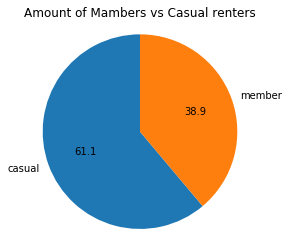

In [17]:
plt.pie(mem_cas, labels = mem_cas.index, startangle = 90, autopct='%.1f')
plt.axis('square')
plt.title('Amount of Mambers vs Casual renters');

- Data is not in favor of BayWheels as there is only 38.9% of renters registered. 

In [18]:
ele_dock = df['rideable_type'].value_counts()

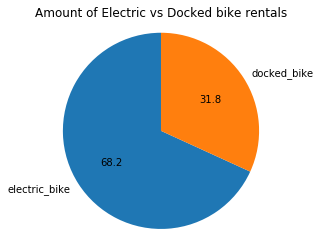

In [19]:
plt.pie(ele_dock, labels = ele_dock.index, startangle = 90, autopct='%.1f')
plt.axis('square')
plt.title('Amount of Electric vs Docked bike rentals');

    - On first look, we can clearly see that electric bikes are much more preferred, but unfortunately I could find any information about actual fleet numbers of BayWheels and that's why we cannot definetelly say one type of bike is more favorable by costumers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    - Data was clear and there was no need for any transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    - I have investigated proportions of mambers / casual renters and types of bikes which were rented. No operations were needed

## Bivariate Exploration


   
  ### Rent duration
    
    - I will analyse rent duration for Casual and Member renters. This might be useful to find out about trends, which groups are more likely to rent for shorter/ longer lengths and maybe for Marketing team to have some insight where to focus on promition materials.

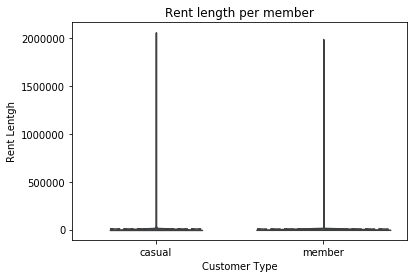

In [20]:
sb.violinplot(data = df, x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

Clearly something went wrong here. I have to investigate why there is so many seconds rented sometimes.

In [21]:
df['time_diff'].max()

Timedelta('23 days 20:30:15')

Clearly the longest rents are breaking our plots, there is need to split Violin Plots into four.
First will focus on trips shorter than 1 hour, 1-2 hours, 2-24 hours and finally days.

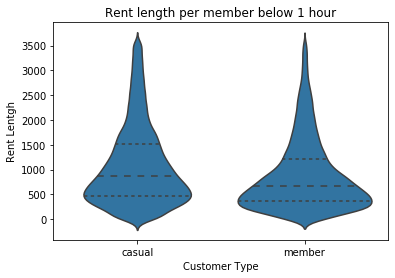

In [22]:
sb.violinplot(data = df.query("time_diff_seconds < 3600"), x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member below 1 hour')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [23]:
len(df.query("time_diff_seconds < 3600"))/len(df)

0.9285936448922611

Almost 93% of the rents are shorter than 1 hour, mean for both casual and members seems to be very close. We can observe that members are very consistent with renting bikes for much shorter times and are trying to avoid rents longer than 20 minutes. Casual renters on the other hand have wider range of rent periods.

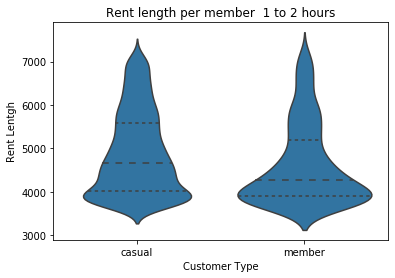

In [24]:
sb.violinplot(data = df.query("time_diff_seconds > 3600 & time_diff_seconds < 7200"), x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member  1 to 2 hours')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [25]:
len(df.query("time_diff_seconds > 3600 & time_diff_seconds < 7200"))/len(df)

0.057258175347737084

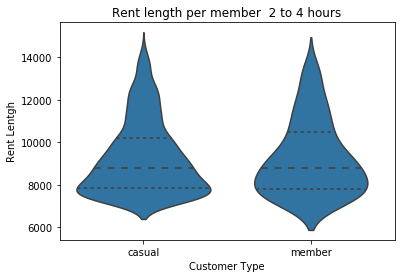

In [26]:
sb.violinplot(data = df.query("time_diff_seconds > 7200 & time_diff_seconds < 14400"), x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member  2 to 4 hours')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [27]:
len(df.query("time_diff_seconds > 7200 & time_diff_seconds < 14400"))/len(df)

0.010567735495584119

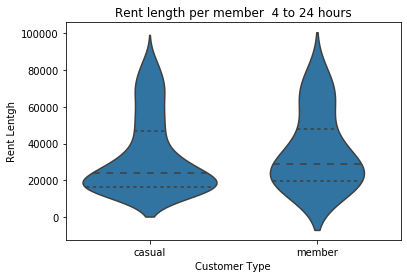

In [28]:
sb.violinplot(data = df.query("time_diff_seconds > 14400 & time_diff_seconds < 86400"), x = 'member_casual', y = 'time_diff_seconds', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member  4 to 24 hours')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [29]:
len(df.query("time_diff_seconds > 14400 & time_diff_seconds < 86400"))/len(df)

0.001822771625521696

Very little of customers choose to rent a bike for period between 4 and 24 hours. For Casual renters same as previously shorter = more frequent. Members more frequently choose to rent bike in lower part of 4-24hour period, but are more likely to rent if also for longer periods.

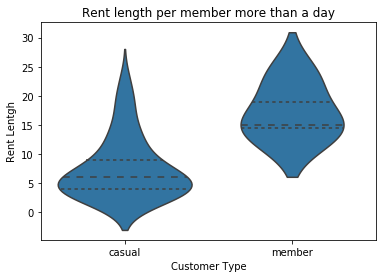

In [30]:
sb.violinplot(data = df.query("time_diff_days > 1"), x = 'member_casual', y = 'time_diff_days', color = sb.color_palette()[0],inner='quartile')
plt.title('Rent length per member more than a day')
plt.xlabel("Customer Type")
plt.ylabel("Rent Lentgh");

In [31]:
len(df.query("time_diff_days >= 1"))/len(df)

0.0017432061974235267

There was only 241 rental which were longer than 24 hours. Casual renters much more frequently choosen mid-long trip rentals where Member renters prefer long term rents. There is only 0.0017% od rents longer than 1 day.

  ### Hour and days popularity


Previously I have discovered that almost 93% of rents had been shorter than 60 minutes, thats why in future analyse I will focus solely on those 93% of rents.

In [32]:
data_to_analyse = df.query("time_diff_seconds <= 3600")

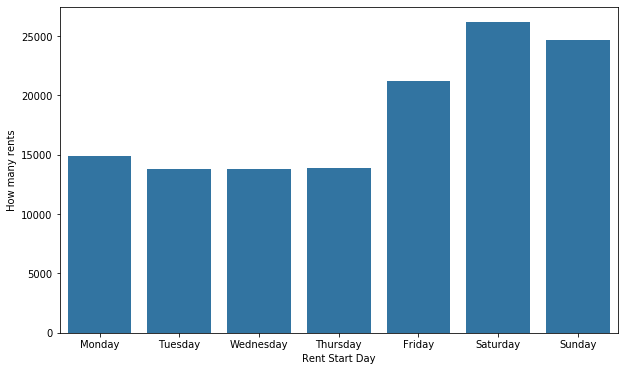

In [33]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_cat = pd.api.types.CategoricalDtype(ordered=True, categories = days)

df['start_day'] = df['start_day'].astype(days_cat)

data_to_analyse = df.query("time_diff_seconds <= 3600")

plt.figure(figsize=[10, 6])
sb.countplot(data = data_to_analyse, x='start_day', color = sb.color_palette()[0]);

plt.xlabel('Rent Start Day');
plt.ylabel('How many rents');

Clearly friday and weekends are most popular days. Monday-Thursday have almost the same amounts of rents. 

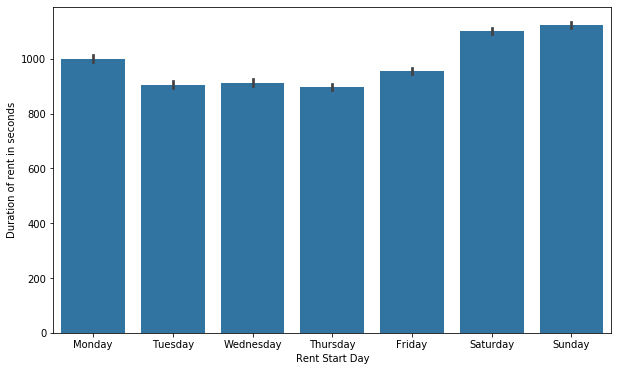

In [34]:
plt.figure(figsize=[10, 6])
sb.barplot(data = data_to_analyse , x='start_day', y = 'time_diff_seconds', color = sb.color_palette()[0]);

plt.xlabel('Rent Start Day');
plt.ylabel('Duration of rent in seconds');

Average rent period seems mostly the same throught whole week with slight advantage of Monday, Saturday and Sunday

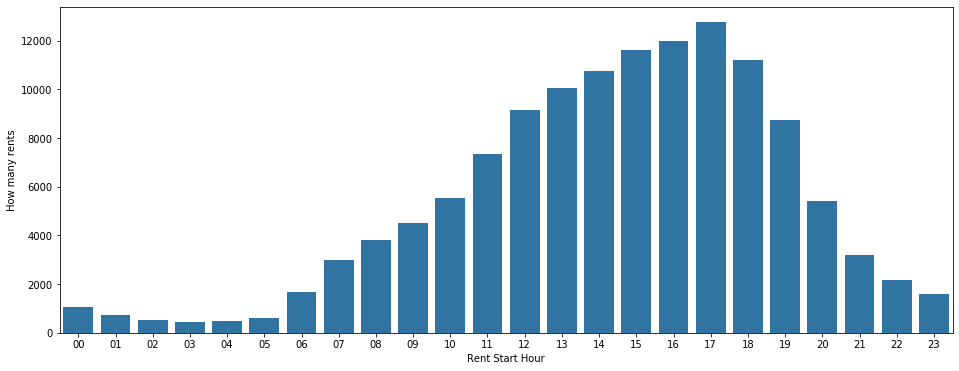

In [35]:
plt.figure(figsize=[16, 6])
sb.countplot(data = data_to_analyse, x='start_hour', color = sb.color_palette()[0]);

plt.xlabel('Rent Start Hour');
plt.ylabel('How many rents');

Most of the rents start to happen between 15:00 and 18:00. These are the times when everybody is getting of work and traffic seems umbereable. Hours between 22:00 - 6:00 are least rented and these are best times for restocking stations and maintenance jobs.

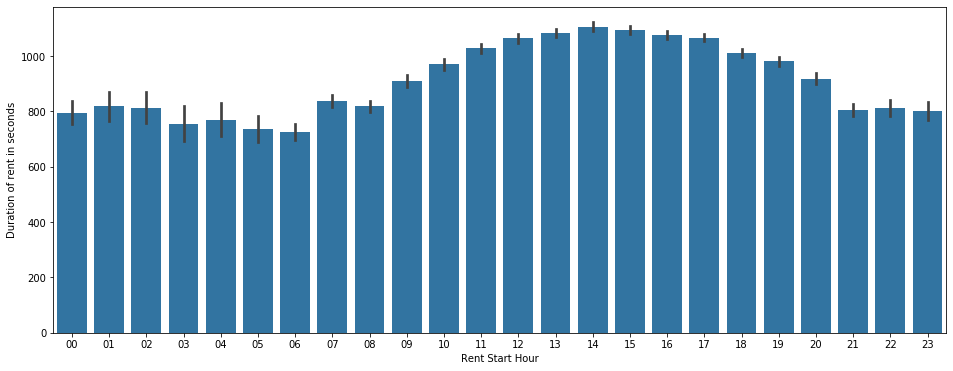

In [36]:
plt.figure(figsize=[16, 6])
sb.barplot(data = data_to_analyse , x='start_hour', y = 'time_diff_seconds', color = sb.color_palette()[0]);

plt.xlabel('Rent Start Hour');
plt.ylabel('Duration of rent in seconds');

Looking at duration of rent in seconds and start hour of rent there is small corellation. Afternoon until evening are one of the longest rents happening.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

  ### Hour, days and rent count


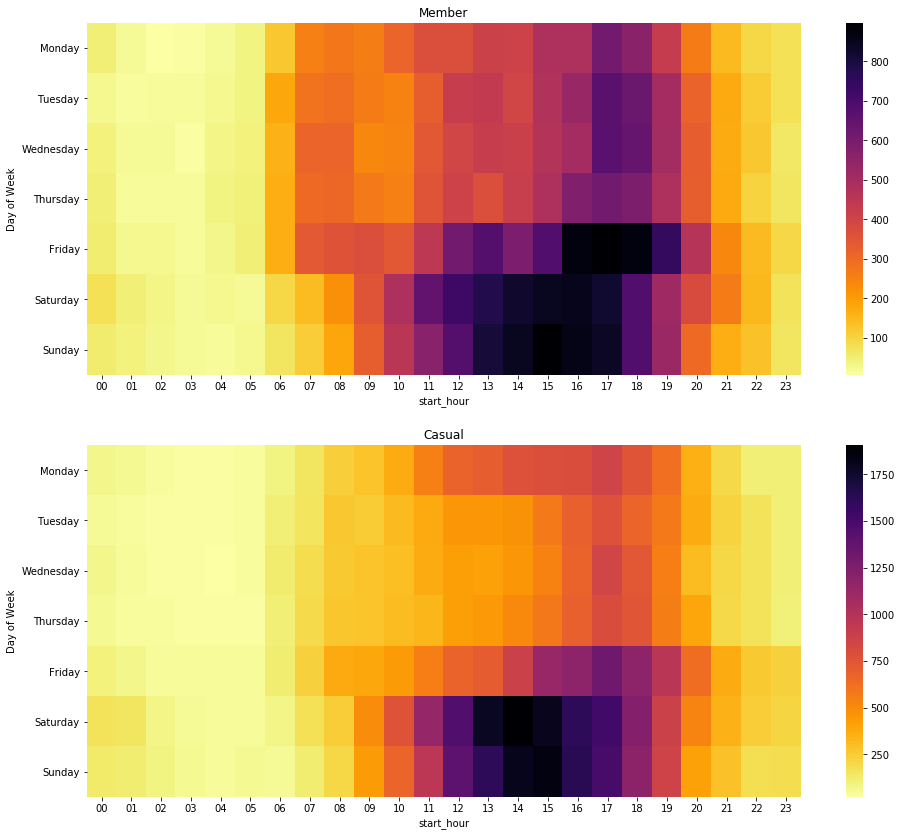

In [37]:
plt.figure(figsize=[16, 10])

plt.subplot(2, 1, 1)
member = data_to_analyse.query('member_casual == "member"')
member_count = member.groupby(['start_day', 'start_hour']).size()
member_count = member_count.reset_index(name='count')
member_count = member_count.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(member_count, cmap='inferno_r')
plt.title('Member')
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
plt.subplots_adjust(top = 1.2)
casual = data_to_analyse.query('member_casual == "casual"')
casual_count = casual.groupby(['start_day', 'start_hour']).size()
casual_count = casual_count.reset_index(name='count')
casual_count = casual_count.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(casual_count, cmap='inferno_r')
plt.title('Casual')
plt.ylabel('Day of Week');



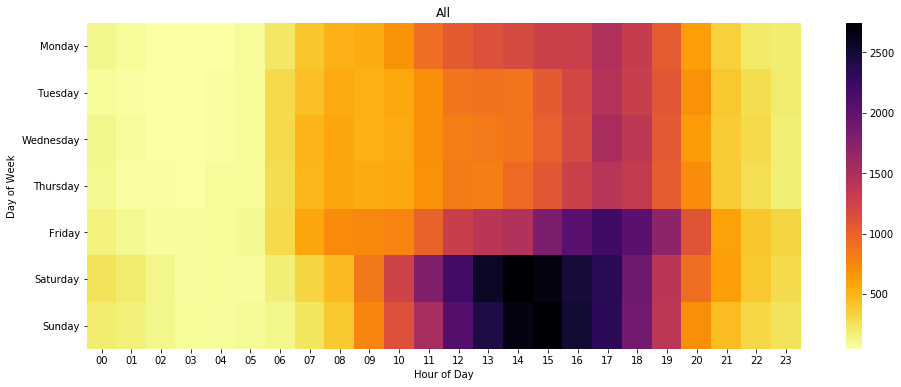

In [38]:
plt.figure(figsize=[16, 6])

all_count = data_to_analyse.groupby(['start_day', 'start_hour']).size()
all_count = all_count.reset_index(name='count')
all_count = all_count.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(all_count, cmap='inferno_r')
plt.title('All')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week');

    - Having only almost 39% of Members clearly shows little impact on overall data. 
    - Members Are much more presistent with their times of rents. There is clear trend in renting bikes mostly at 16, 17 and 18 hours throught whole week quite evenly.
    - Casual renters usually rent bikes only on weekends in addition with Monday, but it is not as strong as what can be seen in Members Heat Map

In [39]:
df.to_csv('baywheels_final.csv')